In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

# Gradient descent - Adam Optimizer
In this exercise you will implement the Adam optimizer and examine its behaviour on the function
$$(1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + x y^3)^2$$ (Beales function) Similar to the discussion in the lecture, implement the Adam optimiser and visualise its behaviour for
different starting points and different learning rates.

In [2]:
def calculate_beale_function(x, y):
    return (1.5 - x + x * y) ** 2 + (2.25 - x + x * y ** 2) ** 2 + (2.625 - x + x * y ** 3) ** 2


def calculate_derivative_beale_function(x, y):
    x_der = 2 * (1.5 - x + x * y) * (-1 + y) + 2 * (2.25 - x + x * y ** 2) * (-1 + y ** 2) + 2 * (
            2.625 - x + x * y ** 3) * (-1 + y ** 3)
    y_der = 2 * (1.5 - x + x * y) * x + 4 * (2.25 - x + x * y ** 2) * x * y + 6 * (2.625 - x + x * y ** 3) * x * y ** 2
    return np.array([x_der, y_der])

 To implement the Adam optimizer we provide you with a class where you just have to write the calculate_step and run_iteration methods. 

In [3]:

class AdamOptimizer:
    def __init__(self, zeroth_derivative, first_derivative, beta_1, beta_2, eta, epsilon):
        self.zeroth_derivative = zeroth_derivative
        self.first_derivative = first_derivative

        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.eta = eta
        self.epsilon = epsilon

        # m, v, w should be a np.ndarray of shape (2,). m is the first moment, v is the second moment and w the position
        # m_record, v_record, w_record have to be np.ndarray of shape (num_steps + 1, 2) (the num_steps parameter
        # is passed to the run_iteration method)
        self.m = None
        self.m_record = None

        self.v = None
        self.v_record = None

        self.w = None
        self.w_record = None

        self.step = 1

    def calculate_step(self):
        """
        Implement the iteration step for the adam optimizer. Write the result to self.m, self.v, self.w and store
        it in self.m_record, self.v_record, self.w_record. Hint: use np.vstack for appending to the records.
        This function should NOT return anything, but only write to class parameters.

        Beware of the shape requirements given above:
            - m, v, w should be a np.ndarray of shape (2,)
            - m_record, v_record, w_record have to be np.ndarray of shape (num_steps + 1, 2) (the num_steps parameter
            is passed to the run_iteration method)
        """
        ### BEGIN SOLUTION
        grad_w = self.first_derivative(self.w[0], self.w[1])

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * grad_w
        m_hat = self.m / (1 - self.beta_1 ** self.step)
        self.m_record = np.vstack([self.m_record, self.m])

        self.v = self.beta_2 * self.v + (1 - self.beta_2) * np.square(grad_w)
        v_hat = self.v / (1 - self.beta_2 ** self.step)
        self.v_record = np.vstack([self.v_record, self.v])

        self.w = self.w - self.eta * np.divide(m_hat, np.sqrt(v_hat) + self.epsilon)
        self.w_record = np.vstack([self.w_record, self.w])

        self.step += 1
        ### END SOLUTION

    def run_iteration(self, m0, v0, w0, num_steps=5000):
        """
        Execute the iteration step num_step times with the given initial conditions. Hint: I wrote the
        initialize_starting_point for your convenience.
        """
        ### BEGIN SOLUTION
        self.initialize_starting_point(m0, v0, w0)

        for _ in range(num_steps):
            self.calculate_step()
        ### END SOLUTION

    def initialize_starting_point(self, m0, v0, w0):
        """
        This method resets the optimizer for a new iteration of new starting positions. You can use it for your
        convenience.

        :param w0: Initial condition position, np.ndarray with shape (2,)
        :param v0: Initial condition second momentum, np.ndarray with shape (2,)
        :param m0: Initial condition first momentum, np.ndarray with shape (2,)
        """
        self.step = 1
        self.m = m0
        self.m_record = self.m
        self.v = v0
        self.v_record = self.v
        self.w = w0
        self.w_record = self.w

    def plot_contour(self, x_range=np.arange(-5, 5, 0.01), y_range=np.arange(-5, 5, 0.01), use_figure=False,
                     title=None, show=False):
        """
        This lets you plot the beales function in 2D. Hint: You can combine it with self.plot_convergence

        :param show: Show the plot with plt.show() -> the next plt command will create a new figure.
        :param title: Title of the plot
        :param use_figure: create a new figure for this plot
        """
        if use_figure:
            fig = self.get_properly_formatted_figure(title=title)
        x_range, y_range = np.meshgrid(x_range, y_range)
        vec_func = np.vectorize(self.zeroth_derivative)
        z = vec_func(x_range, y_range)
        plt.contour(x_range, y_range, z, levels=np.logspace(0, 5, 45), norm=LogNorm(), cmap="RdYlBu_r")
        if show:
            plt.show()

    def plot_convergence(self, use_figure=False, title=None, show=False):
        """
        This lets you plot the convergence you calculated. Hint: You can combine it with self.plot_contour.

        :param show: Show the plot with plt.show() -> the next plt command will create a new figure.
        :param title: Title of the plot
        :param use_figure: create a new figure for this plot
        """
        if use_figure:
            fig = self.get_properly_formatted_figure(title=title)
        plt.plot(self.w_record[:, 0], self.w_record[:, 1])
        plt.scatter(self.w_record[-1, 0], self.w_record[-1, 1], marker="*", s=100)
        if show:
            plt.show()

    @staticmethod
    def get_properly_formatted_figure(title):
        """
        This is just to get a better size and readability.

        :param title: title of the plot
        :return: matplotlib.pyplot figure
        """
        fig = plt.figure(figsize=(15, 15))
        fig.patch.set_facecolor("white")
        ax = fig.add_subplot(1, 1, 1)
        ax.spines['left'].set_position("zero")
        ax.spines['bottom'].set_position("zero")
        if title is None:
            ax.set_title("")
        else:
            ax.set_title(title)
        return fig

In [4]:
# your code will be autograded in this cell
### BEGIN HIDDEN TESTS
test_adam = AdamOptimizer(calculate_beale_function, calculate_derivative_beale_function, beta_1=0.9,
                          beta_2=0.99, epsilon=1e-8,
                          eta=1e-3)

test_adam.initialize_starting_point(np.array([0, 0]), np.array([0, 0]), np.array([0, 0]))
test_adam.calculate_step()

# Check that log works
assert len(test_adam.m_record) == 2
assert len(test_adam.v_record) == 2
assert len(test_adam.w_record) == 2

assert type(test_adam.w_record) == np.ndarray
assert test_adam.w_record.shape == (2, 2)

### END HIDDEN TESTS

In [5]:
# your code will be autograded in this cell
### BEGIN HIDDEN TESTS
test_adam = AdamOptimizer(calculate_beale_function, calculate_derivative_beale_function, beta_1=0.9,
                          beta_2=0.99, epsilon=1e-8,
                          eta=1e-3)

test_adam.initialize_starting_point(np.array([0, 0]), np.array([0, 0]), np.array([0, 0]))
test_adam.calculate_step()
# Check that the step gives the correct values
assert np.isclose(np.array([-1.275, 0.]), test_adam.m).all()
assert np.isclose(np.array([1.625625, 0.]), test_adam.v).all()
assert np.isclose(np.array([0.001, 0]), test_adam.w).all()
### END HIDDEN TESTS

In [10]:
# your code will be autograded in this cell
### BEGIN HIDDEN TESTS
test_adam = AdamOptimizer(calculate_beale_function, calculate_derivative_beale_function, beta_1=0.9,
                          beta_2=0.99, epsilon=1e-8,
                          eta=1e-3)
#check that it converges to the correct minimum
test_adam.run_iteration(np.array([0, 0]), np.array([0, 0]), np.array([-4, 4]))
assert test_adam.step == 5001 or test_adam == 5000
assert np.isclose(test_adam.w[1], 1, atol=2).all()
test_adam.run_iteration(np.array([0, 0]), np.array([0, 0]), np.array([4, -4]))
assert np.isclose(test_adam.w, np.array([3, 0.5]), atol=2).all()
### END HIDDEN TESTS

For a learning rate of 10^{−3} ($ \beta_1 = 0.9; \beta_2 = 0.99;  \epsilon = 10^{-8} $), scan over a sensible grid of starting points.
Highlight the different endpoints associated to these starting points in a contour plot. Use the methods plot_convergence and plot_contour that are already implemented in the class and qualitatively
describe the results you find.

In [7]:
adam_optimizer = AdamOptimizer(calculate_beale_function, calculate_derivative_beale_function, beta_1=0.9,
                               beta_2=0.99, epsilon=1e-8,
                               eta=1e-3)

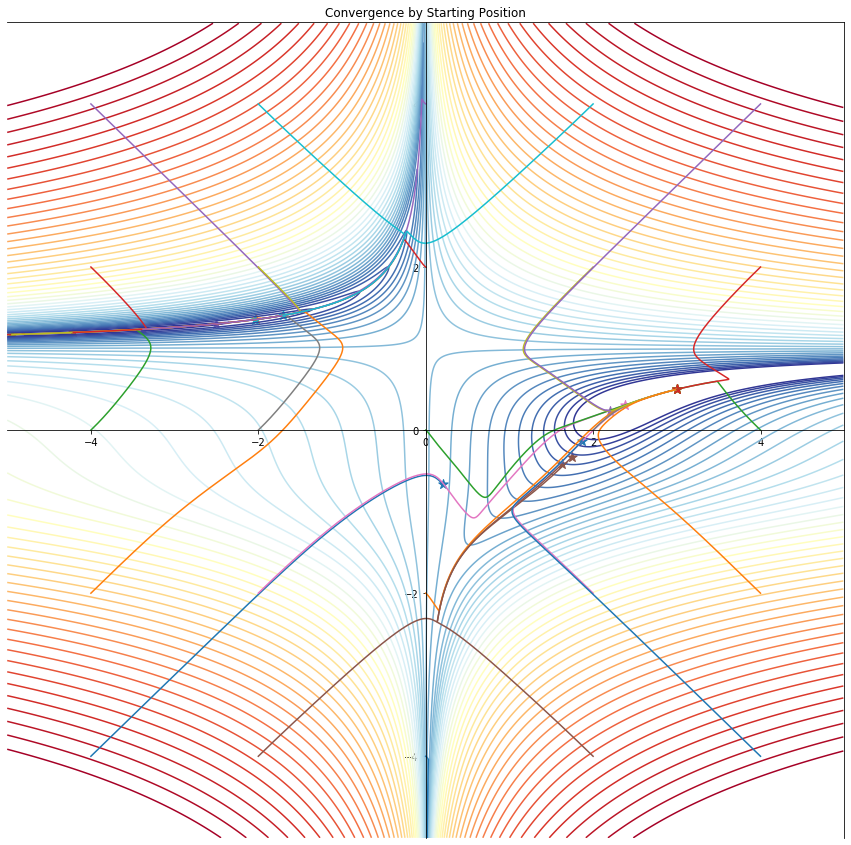

In [8]:
fig = adam_optimizer.get_properly_formatted_figure("Convergence by Starting Position")
### BEGIN SOLUTION
starting_range = range(-4, 5, 2)
for starting_x in starting_range:
    for starting_y in starting_range:
        adam_optimizer.run_iteration(np.array([0, 0]), np.array([0, 0]), np.array([starting_x, starting_y]),
                                     num_steps=5000)

        adam_optimizer.plot_convergence()
adam_optimizer.plot_contour()
### END SOLUTION
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.show()

In [9]:
# your code is autograded in this cell
### BEGIN HIDDEN TESTS

ax = fig.get_axes()

lines = ax[0].get_lines()
print(len(list(lines)))
assert len(lines) > 5

### END HIDDEN TESTS

25


Play around with the optimizer, try different learning rates, parameters, etc. and find out how they impact the convergence behaviour.

(This is optional, but it is important that you get an intuition for the parameters)